In [3]:
# Dependencies
# ----------------------------------
# Imports the method used for connecting to DBs
from sqlalchemy import create_engine

# Imports the methods needed to abstract classes into tables
from sqlalchemy.ext.declarative import declarative_base

# Allow us to declare column types
from sqlalchemy import Column, Integer, String, Float, ForeignKey, Table 

from sqlalchemy.orm import relationship

# Pandas
import pandas as pd

# plotting
import matplotlib.pyplot as plt

# Sets an object to utilize the default declarative base in SQL Alchemy
Base = declarative_base()

# Get the password for securely accessing the database
password=input('please input password for database connection')


In [5]:
# Set up the engine and connection...
connectstring='postgresql+psycopg2://postgres:'+ password + '@localhost:5432/sql-challenge'

engine = create_engine(connectstring) 
conn = engine.connect()  

In [6]:
# Create a "Metadata" Layer That Abstracts our SQL Database
# ----------------------------------
# Use this to clear out the db
# ----------------------------------
Base.metadata.drop_all(engine)

# Create (if not already in existence) the tables associated with our classes.
Base.metadata.create_all(engine)

# Create a Session Object to Connect to DB
# ----------------------------------
# Session is a temporary binding to our DB
from sqlalchemy.orm import Session
session = Session(bind=engine)

In [7]:
# verify capability read / get all rows into pandas from all tables in the sql-challenge database 
department_pd = pd.read_sql("SELECT * FROM department", conn)
department_employee_pd = pd.read_sql("SELECT * FROM department_employee", conn)
department_manager_pd =  pd.read_sql("SELECT * FROM department_manager", conn)
title_pd =  pd.read_sql("SELECT * FROM title", conn)
salary_pd =  pd.read_sql("SELECT * FROM salary", conn)
employee_pd =  pd.read_sql("SELECT * FROM employee", conn)
# check that all tables completely loaded and if any null values
print(department_pd.count())
print(department_employee_pd.count())
print(department_manager_pd.count())
print(title_pd.count())
print(salary_pd.count())
print(employee_pd.count())




department_number    9
department_name      9
dtype: int64
employee_number      331603
department_number    331603
dtype: int64
department_number    24
employee_number      24
dtype: int64
title_id    7
title       7
dtype: int64
employee_number    300024
salary             300024
dtype: int64
employee_number      300024
employee_title_id    300024
birth_date           300024
first_name           300024
last_name            300024
gender               300024
hire_date            300024
dtype: int64


In [8]:
# select the salary info from the salary table
salaries_pd =  pd.read_sql("Select Salary from Salary", conn)
salaries_pd.count()

salary    300024
dtype: int64

Histogram Chart of Salaries is skewed to lower salaries in the 40K range:



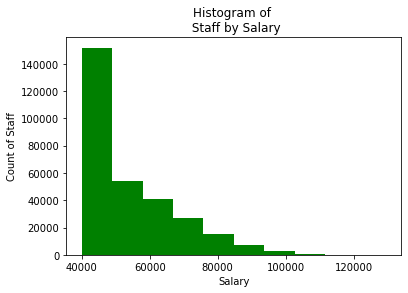

In [36]:
# plot a histogram of the salaries
salaries_pd.salary.plot(kind='hist',color='g', align="mid",title="Histogram of \n Staff by Salary")
plt.ylabel("Count of Staff")
plt.xlabel("Salary")
print(f"Histogram Chart of Salaries is skewed to lower salaries in the 40K range:\n")
plt.show()

In [22]:
# select the salary info by title from the employee, title and salary tables
title_salaries_pd =  pd.read_sql("Select t.Title, s.Salary \
from Employee e, Salary s, Title t \
where e.Employee_Number = s.Employee_Number \
and t.title_id = e.employee_title_id", conn)



In [33]:
# take a closer look at the top salary info....pull the top 10 groups...and 
top_10_salary_counts_pd =  pd.read_sql("Select  salary, count(salary) \
from salary \
group by salary \
having count(salary) > 1 \
order by count(salary) desc \
limit(10)", conn)
print("The Top 10 Salary Counts Look Strange")
top_10_salary_counts_pd.head(10)

The Top 10 Salary Counts Look Strange


,salary,count
0,40000,95346
1,55581,19
2,53738,18
3,53078,18
4,47454,17
5,44564,17
6,45184,17
7,43710,16
8,43995,16
9,51499,16


In [27]:
# title_salaries_pd = title_salaries_pd.groupby("title")
# print(title_salaries_pd.count())
# title_salaries_pd.head()

# Create a group based on the values in the 'title' column
title_group = title_salaries_pd.groupby('title')

# get the average salary by title in our group
average_salary_title = title_group['salary'].mean()



Bar Chart of Average Salary by Title shows: 
 1) Average Staff salary is higher than managers?
 2) Average Staff Salary is higher than Technical leaders and engineers?


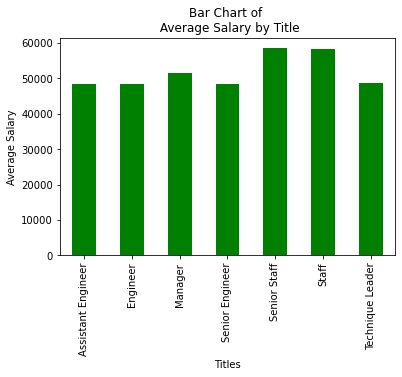

<Figure size 432x288 with 0 Axes>

In [39]:
# plot a bar of the average salary by title
# Create a bar chart based off of the group series from before
count_chart = average_salary_title.plot(kind='bar',color='g', align="center",title="Bar Chart of \n Average Salary by Title")

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Titles")
count_chart.set_ylabel("Average Salary")

print(f"Bar Chart of Average Salary by Title shows: \n 1) Average Staff salary is higher than managers?\n 2) Average Staff Salary is higher than Technical leaders and engineers?")

plt.show()
plt.tight_layout()




In [61]:
# Get listing of name frequency....
# Suspicious number of frequent first and last names 
first_names_pd = pd.read_sql("Select  first_name, count(first_name) from employee \
group by first_name \
order by count(first_name)",conn) 
print(first_names_pd.head(5))

last_names_pd = pd.read_sql("Select  last_name, count(last_name) from employee \
group by last_name \
order by count(last_name)",conn) 
print(last_names_pd.head(5)) 


  first_name  count
0      April      1
1      Renny    185
2       Lech    185
3       Ebbe    190
4  Jaroslava    193
    last_name  count
0    Foolsday      1
1    Sadowsky    145
2       Merro    147
3        Zykh    148
4  Guardalben    148


In [53]:
# get my personnel info for the meeting

my_info_pd =  pd.read_sql("Select e.*, d.Department_Name, t.title, s.salary \
    from Employee e, Department d, Department_Employee de, salary s, title t \
where 	 \
	e.employee_number = 499942 and  \
	de.Employee_Number = e.Employee_Number and \
	d.Department_Number = de.Department_Number and \
	s.employee_number = e.employee_number and \
	t.title_id = e.employee_title_id", conn)
print("My Info: \n")
my_info_pd.head()

My Info: 



,employee_number,employee_title_id,birth_date,first_name,last_name,gender,hire_date,department_name,title,salary
0,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10,Development,Technique Leader,40000


In [54]:
# get my bosses info for the meeting

manager_info_pd =  pd.read_sql("Select \
e2.first_name as Manager_Name_First, e2.last_name as Manager_Name_Last, \
t.title, d.Department_Name, s.salary   \
from Employee e, Department d, Department_Employee de, employee e2, \
department_manager md, title as t, salary as s \
where 	 \
	e.employee_number = 499942 and  \
	de.Employee_Number = e.Employee_Number and  \
	d.Department_Number = de.Department_Number and  \
	md.department_number = de.department_number and  \
	e2.employee_number = md.employee_number and  \
	t.title_id = e2.employee_title_id and \
    s.employee_number = e2.employee_number", conn)
print("My Managers' Info: \n")
manager_info_pd.head()

My Managers' Info: 



,manager_name_first,manager_name_last,title,department_name,salary
0,Leon,DasSarma,Manager,Development,40000
1,DeForest,Hagimont,Manager,Development,48626
